# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
numerical = ['num_likes', 'num_comments', 'num_sent', 'sent_avg_length', 'num_words', 
             'num_unique_words', 'unique_words_percent', 'age', 'num_cats',
             'words_exist_per_cent',
             'shortlisted',
             'emotion_anger', 'emotion_fear', 'emotion_joy', 'emotion_love', 
             'emotion_sadness', 'emotion_surprise', 
             'sentiment_POSITIVE_no_prepro', 'sentiment_NEGATIVE_no_prepro', 
             'sentiment_hf_text']

txt_features = ['text_str', 'text_str_lem']

categories = [   'cat_Age', 'cat_Happy', 'cat_Thriller', 
                 'cat_Friendship', 'cat_East', 'cat_Inspirational', 
                 'cat_Christian', 'cat_Bedtime', 'cat_Drama', 'cat_Horror', 
                 'cat_Lesbian', 'cat_High', 'cat_Science', 'cat_American', 
                 'cat_Speculative', 'cat_Funny', 'cat_Adventure', 
                 'cat_Nonfiction', 'cat_African', 'cat_Christmas', 
                 'cat_Teens', 'cat_Fantasy', 'cat_Holiday', 'cat_Western', 
                 'cat_Young', 'cat_Coming', 'cat_Suspense', 'cat_Romance', 
                 'cat_Urban', 'cat_Latinx', 'cat_Desi', 'cat_Asian', 
                 'cat_Black', 'cat_Sad', 'cat_Kids', 'cat_People', 'cat_Color', 
                 'cat_Fiction', 'cat_Contemporary', 'cat_Mystery', 'cat_Adult', 
                 'cat_Transgender', 'cat_Historical', 'cat_Middle', 'cat_Gay', 
                 'cat_Indigenous', 'cat_Crime', 'num_cats', 'cat_School', 
                 'cat_Creative']

In [3]:
feats_to_keep = numerical + txt_features + categories

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv", 
                 usecols=feats_to_keep)

In [6]:
target = ['num_likes']

# General features

## Preprocessing

In [7]:
numerical.remove('num_likes')
numerical.remove('num_comments')

In [8]:
X = df[numerical+categories]

In [9]:
# log transformation
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
y = transformer.transform(df[target].values).ravel()

In [10]:
# scaling
y = (y-y.mean())/y.std()

Text(0.5, 1.0, 'distribution of target after log transformation and scaling')

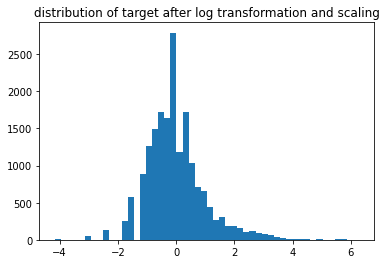

In [11]:
plt.figure()
plt.hist(y, bins=50)
plt.title('distribution of target after log transformation and scaling')

In [12]:
# log transform 
for var_to_log in ['sent_avg_length', 'num_unique_words', 'emotion_love']:
  X[var_to_log] = X[var_to_log].apply(np.log1p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
from sklearn.model_selection import train_test_split

test_size = 20/100

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14598, 68), (3650, 68), (14598,), (3650,))

In [14]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

X_train.shape, X_test.shape

((14598, 68), (3650, 68))

## Predictions

### Linear regression

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
print(f'R2 on train set: {lr.score(X_train, y_train)}')
print(f'R2 on test set: {lr.score(X_test, y_test)}')

R2 on train set: 0.09003925523957468
R2 on test set: 0.07685602394947721


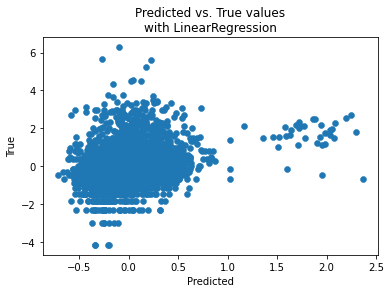

In [17]:
plt.scatter(x=lr.predict(X_test), y=y_test, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs. True values\nwith LinearRegression')
plt.show()

### SVM

In [18]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [19]:
print(f'R2 on train set: {svr.score(X_train, y_train)}')
print(f'R2 on test set: {svr.score(X_test, y_test)}')


R2 on train set: 0.19335606515011838
R2 on test set: 0.04792735448813612


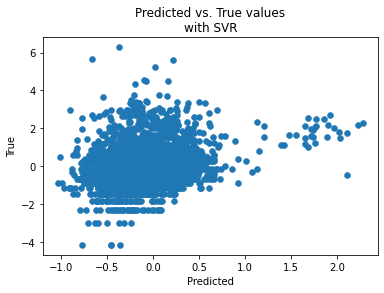

In [20]:
plt.scatter(x=svr.predict(X_test), y=y_test, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs. True values\nwith SVR')
plt.show()

### KNN 

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [22]:
print(f'R2 on train set: {knr.score(X_train, y_train)}')
print(f'R2 on test set: {knr.score(X_test, y_test)}')

R2 on train set: 0.2831055380881201
R2 on test set: -0.11854644836965678


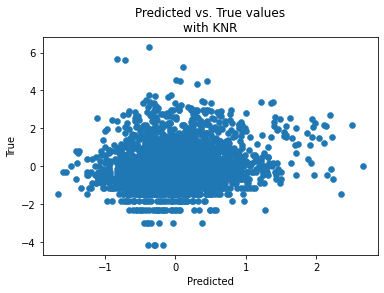

In [23]:
plt.scatter(x=knr.predict(X_test), y=y_test, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs. True values\nwith KNR')
plt.show()

### Random forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [25]:
print(f'R2 on train set: {regr.score(X_train, y_train)}')
print(f'R2 on test set: {regr.score(X_test, y_test)}')

R2 on train set: 0.34542561884130196
R2 on test set: 0.14145178559206995


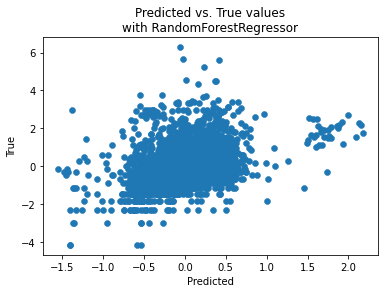

In [26]:
plt.scatter(x=regr.predict(X_test), y=y_test, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs. True values\nwith RandomForestRegressor')
plt.show()

# TF/IDF only

## Preprocessing

In [27]:
sample_length = 10000
max_features = 2000

In [28]:
stories_lemma = df.text_str_lem.tolist()[:sample_length]

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3), 
                             max_features=max_features)
X = vectorizer.fit_transform(stories_lemma)

In [30]:
# the target is already transformed

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y[:sample_length], 
                                                    test_size=0.3, 
                                                    random_state=1)

In [32]:
# normalize
from sklearn.preprocessing import normalize
# X_train = normalize(X_train, norm='l1', axis=0)
# need to normalize X_test manually...

In [33]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

## Predictions

### Linear regression

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
print(f'R2 on train set: {lr.score(X_train, y_train)}')
print(f'R2 on test set: {lr.score(X_test, y_test)}')

R2 on train set: 0.3518052711204911
R2 on test set: -0.30560598185320376


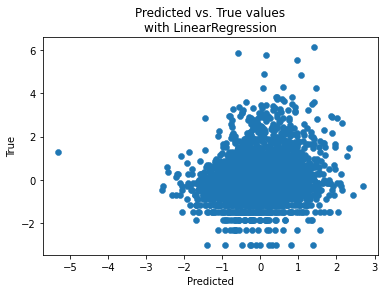

In [36]:
plt.scatter(x=lr.predict(X_test), y=y_test, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs. True values\nwith LinearRegression')
plt.show()

### SVM

In [37]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [38]:
print(f'R2 on train set: {svr.score(X_train, y_train)}')
print(f'R2 on test set: {svr.score(X_test, y_test)}')


R2 on train set: 0.17374758607810592
R2 on test set: 0.03668636627952582


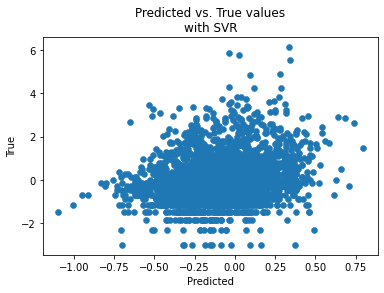

In [39]:
plt.scatter(x=svr.predict(X_test), y=y_test, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs. True values\nwith SVR')
plt.show()

### KNN

In [40]:
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [41]:
print(f'R2 on train set: {knr.score(X_train, y_train)}')
print(f'R2 on test set: {knr.score(X_test, y_test)}')

R2 on train set: 0.2588169293950665
R2 on test set: -0.12705722608942693


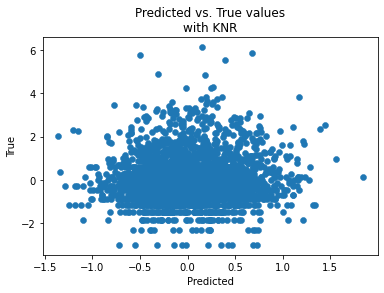

In [42]:
plt.scatter(x=knr.predict(X_test), y=y_test, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs. True values\nwith KNR')
plt.show()

### Random forest

R2 on train set: 0.2348259701585147
R2 on test set: 0.02503711594384206


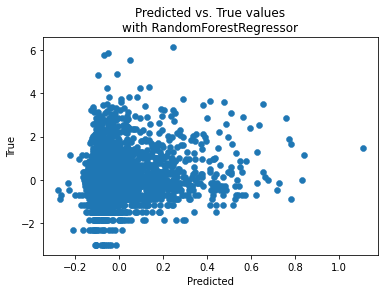

In [43]:
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)
print(f'R2 on train set: {regr.score(X_train, y_train)}')
print(f'R2 on test set: {regr.score(X_test, y_test)}')
plt.scatter(x=regr.predict(X_test), y=y_test, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs. True values\nwith RandomForestRegressor')
plt.show()

# TF/IDF and general features

In [44]:
# X contains the TF/IDF features
X_gen = df[numerical+categories]

In [45]:
for var_to_log in ['sent_avg_length', 'num_unique_words', 'emotion_love']:
  X_gen[var_to_log] = X[var_to_log].apply(np.log1p)

IndexError: ignored

In [ ]:
# merge X and X_gen
# TODO

In [ ]:
test_size = 20/100

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=42)


In [ ]:
scaler = StandardScaler()
X_train[X_gen.columns] = pd.DataFrame(scaler.fit_transform(X_train[X_gen.columns]), columns=X_gen.columns)
X_test[X_gen.columns] = pd.DataFrame(scaler.transform(X_test[X_gen.columns]), columns=X_gen.columns)

